In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('new_data.csv')
pd.options.display.float_format = '{:,.2f}'.format
df=df[df['category'] == 'MC']
df.head()

,month,account_id,region,category,spend_level,revenue,live_ad,new_AA,paid_ad,listing_fee,...,multi_bump_feature,sa_feature,other_feature,shop_feature,adview_received,adview_per_live_ad_per_day,lead_received,lead_per_live_ad_per_day,spending_per_paid_ads,spending_per_live_ad
14,2020-12-01,88,HN,MC,light,250000,2.00,2.00,2,2,...,0,0,1,1,186.00,7.15,7.00,0.27,"125,000.00","125,000.00"
15,2021-10-01,88,HN,MC,light,95455,11.00,0.00,4,0,...,0,0,0,0,"1,236.00",4.87,22.00,0.09,"23,863.75","8,677.73"
16,2020-10-01,144,HCM,MC,light,359091,NaN,NaN,8,7,...,0,0,0,0,NaN,NaN,NaN,NaN,"44,886.38",NaN
17,2020-11-01,144,HCM,MC,light,504545,8.00,7.00,9,9,...,0,0,0,0,"2,437.00",60.92,105.00,2.62,"56,060.56","63,068.12"
18,2020-12-01,144,HCM,MC,light-medium,604545,9.00,7.00,8,7,...,0,0,0,0,"3,860.00",59.38,172.00,2.65,"75,568.12","67,171.67"


In [3]:
df['month'] = pd.to_datetime(df['month'])
df['month_ex'] = df['month'].dt.month
df['month_ex'].unique()

array([12, 10, 11,  1,  2,  3,  4], dtype=int64)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46151 entries, 14 to 73348
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   month                       46151 non-null  datetime64[ns]
 1   account_id                  46151 non-null  int64         
 2   region                      46151 non-null  object        
 3   category                    46151 non-null  object        
 4   spend_level                 46151 non-null  object        
 5   revenue                     46151 non-null  int64         
 6   live_ad                     42024 non-null  float64       
 7   new_AA                      42024 non-null  float64       
 8   paid_ad                     46151 non-null  int64         
 9   listing_fee                 46151 non-null  int64         
 10  bump_feature                46151 non-null  int64         
 11  multi_bump_feature          46151 non-null  int64    

In [5]:
df.month_ex.nunique()

7

Missing Data displayed in %

In [6]:
missing = df.isna().sum()

missing_per = missing/len(df['account_id'])*100
missing_per.sort_values(ascending=False)

lead_per_live_ad_per_day     10.31
lead_received                10.31
adview_per_live_ad_per_day    8.97
adview_received               8.97
spending_per_live_ad          8.94
live_ad                       8.94
new_AA                        8.94
spending_per_paid_ads         0.05
month                         0.00
sa_feature                    0.00
shop_feature                  0.00
other_feature                 0.00
multi_bump_feature            0.00
account_id                    0.00
bump_feature                  0.00
listing_fee                   0.00
paid_ad                       0.00
revenue                       0.00
spend_level                   0.00
category                      0.00
region                        0.00
month_ex                      0.00
dtype: float64

#### Average revenue generated by each spend_level

In [7]:
grouped = df.groupby('spend_level')
original_mean_revenue = grouped['revenue'].mean()
original_mean_revenue

spend_level
heavy          6,243,110.35
light            138,420.12
light-medium     735,973.38
medium         1,393,502.79
medium-heavy   2,423,815.70
Name: revenue, dtype: float64

<AxesSubplot:xlabel='spend_level', ylabel='Count'>

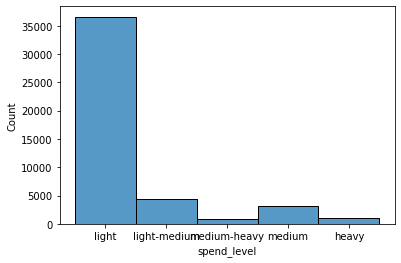

In [8]:
import seaborn as sns

sns.histplot(df['spend_level'])

In [9]:
spend_level = df.groupby('spend_level')
spend_level.revenue.sum().sort_values(ascending=False)

spend_level
heavy           6099518809
light           5067007020
medium          4492652979
light-medium    3248586489
medium-heavy    2254148600
Name: revenue, dtype: int64

### Amount of unique user per spend_level

In [10]:
spend_level['account_id'].nunique()

spend_level
heavy            193
light           8873
light-medium    1406
medium           865
medium-heavy     321
Name: account_id, dtype: int64

In [11]:
df.groupby(['spend_level', 'account_id']).revenue.sum().sort_values(ascending=False)

spend_level  account_id
heavy        1079050       1016726735
             4619917        400971042
             4229532        146958243
             2206491        108441576
             12627433        99078998
                              ...    
light        8934598                0
             1141336                0
             3985083                0
             12098939               0
             4910346                0
Name: revenue, Length: 11658, dtype: int64

In [12]:
spend_level['bump_feature'].sum()

spend_level
heavy           292019
light           236360
light-medium    195687
medium          283493
medium-heavy    144331
Name: bump_feature, dtype: int64

## Seperating light and light-medium user for analysis

In [13]:
df_light = df[df['spend_level'].isin(['light', 'light-medium'])]

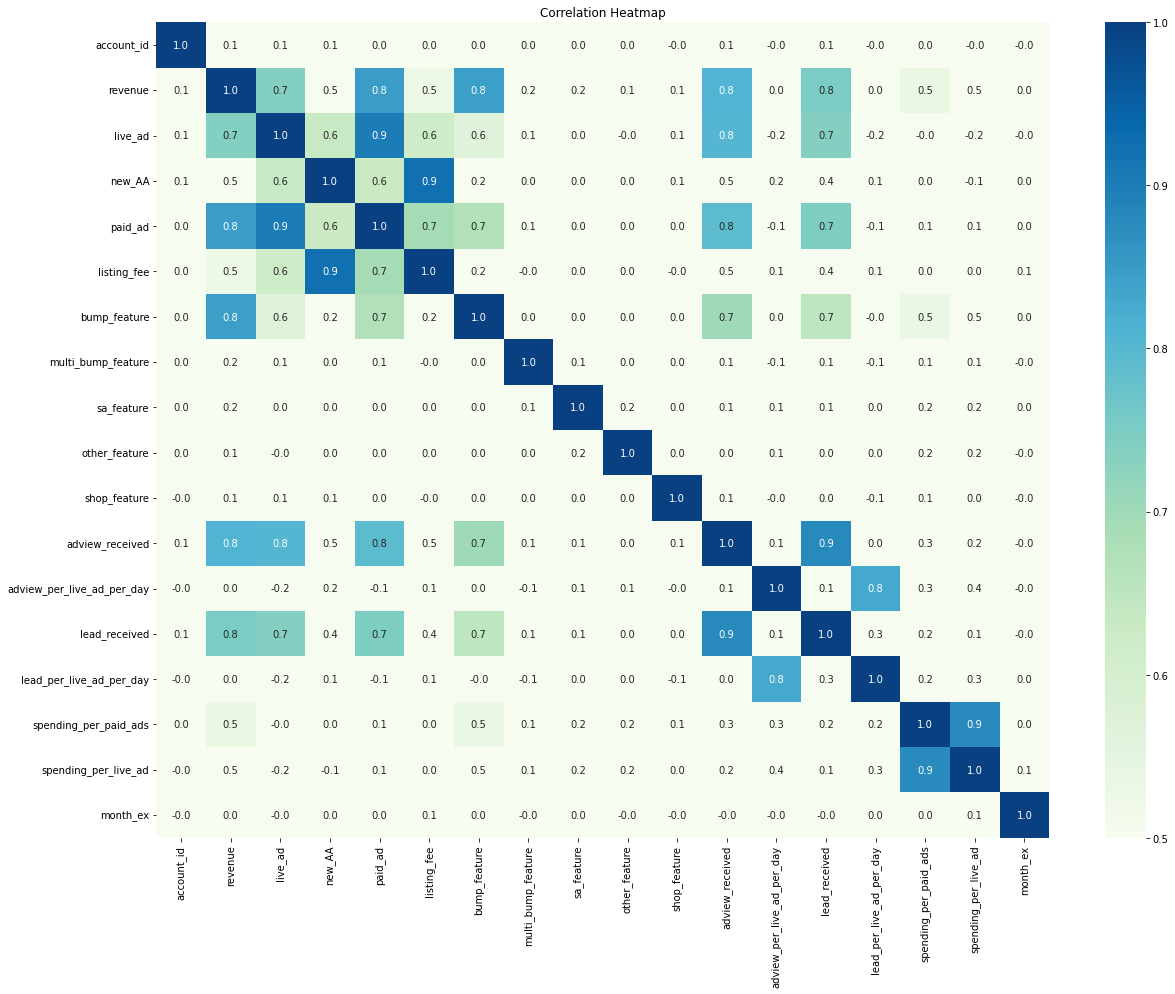

In [14]:
corr_mat_spearman = df_light.corr(method='spearman')
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat_spearman,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

In [15]:
df_high = df[df['spend_level'].isin(['light', 'light-medium', 'medium', 'medium-heavy'])]

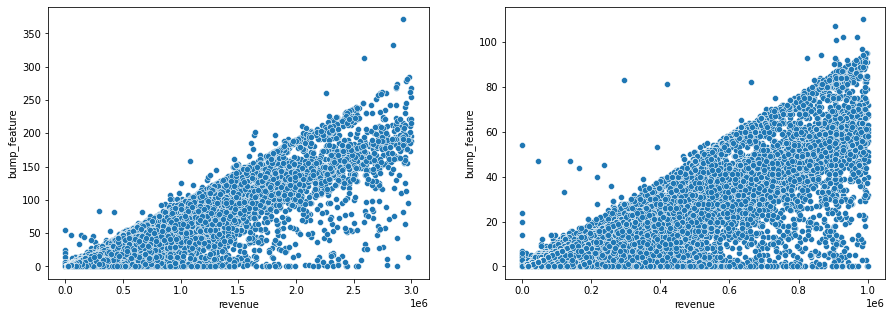

In [16]:
fig,axes= plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(ax=axes[0],y=df_high['bump_feature'], x=df_high['revenue']) 
sns.scatterplot(ax=axes[1],y=df_light['bump_feature'], x=df_light['revenue'])
plt.show()

Scatter shows high bump_feature usage **correlately strongly** with revenue. But interestingly, higher revenue does not indicate higher bump usage.

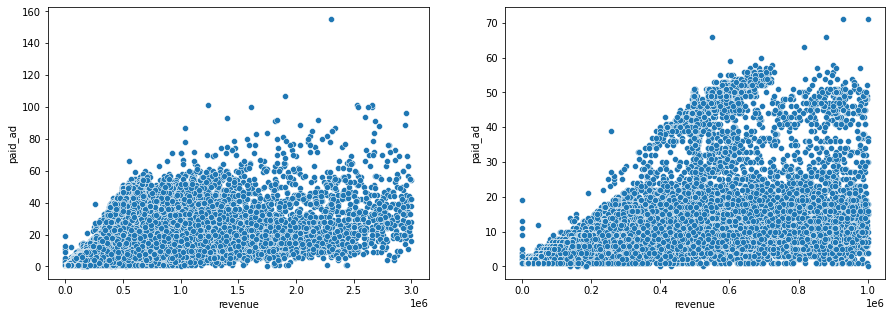

In [17]:
fig,axes= plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(ax=axes[0],y=df_high['paid_ad'], x=df_high['revenue']) 
sns.scatterplot(ax=axes[1],y=df_light['paid_ad'], x=df_light['revenue'])
plt.show()

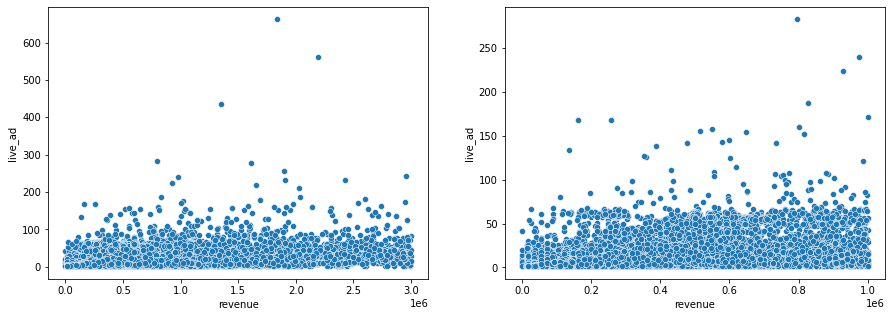

In [18]:
fig,axes= plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(ax=axes[0],y=df_high['live_ad'], x=df_high['revenue']) 
sns.scatterplot(ax=axes[1],y=df_light['live_ad'], x=df_light['revenue'])
plt.show()

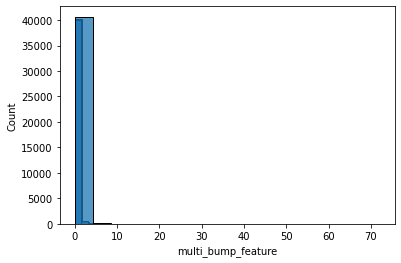

In [19]:
sns.histplot(df_light['multi_bump_feature'])
sns.histplot(df_light['sa_feature'])
sns.histplot(df_light['other_feature'])
plt.show()

<AxesSubplot:xlabel='revenue'>

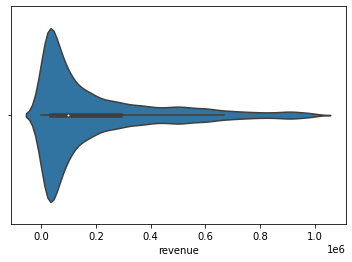

In [20]:
sns.violinplot(x=df_light.revenue)

<AxesSubplot:xlabel='revenue', ylabel='Proportion'>

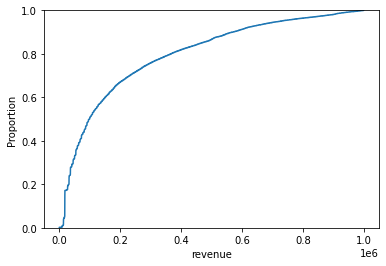

In [21]:
sns.ecdfplot(df_light.revenue)

CDF shows 80% of light and light-medium users spent about 400,000 or less. The longtail on Violin plot indicates a small amount of outliers, spending up to 1,000,000.

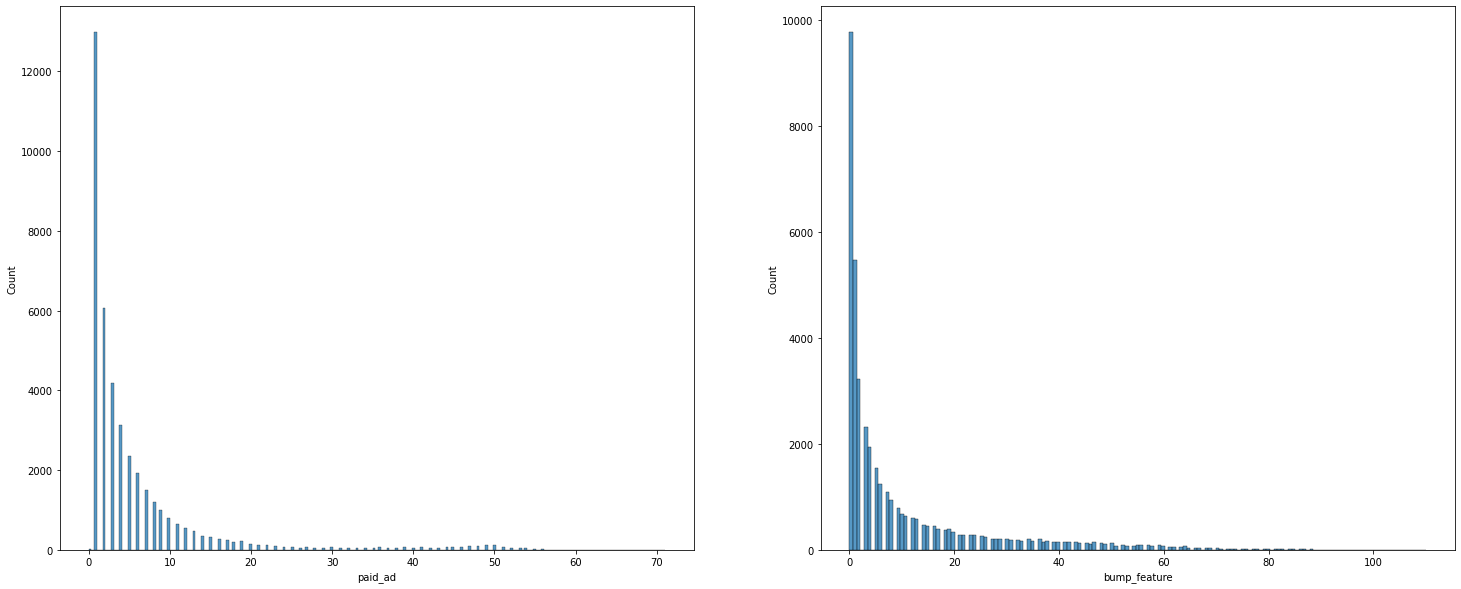

In [22]:
col = ['paid_ad', 'bump_feature']
fig,axes= plt.subplots(1,2, figsize=(25,10))
for u, i in enumerate(col):
    sns.histplot(df_light[i],ax=axes[u])
plt.show()

Int64Index([1, 2, 3, 4, 10, 11, 12], dtype='int64', name='month_ex')


<AxesSubplot:xlabel='month_ex'>

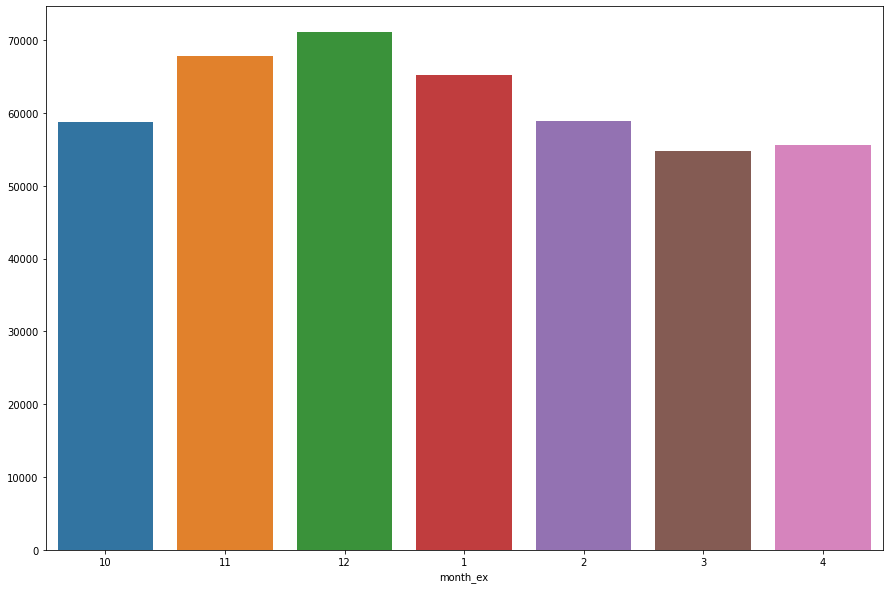

In [23]:
month = df_light.groupby('month_ex')
X = month.bump_feature.sum()
print(X.index)
plt.figure(figsize=(15,10))
sns.barplot(y=X.values,x=X.index,order=[10,11,12,1,2,3,4])

Recalculate correlation using Spearman to eliminiate outliers and skewed distributions, takes into account non-linear relationship.

----
### Detecting "LOST", aka the amount of user leaving the platform starting in January. 

In [24]:
beg_period = [10,11,12,1,2]
end_period = [3,4]
active_month = df.groupby('account_id').month_ex.unique()
bool_res = []
for i in active_month:
    bool_res.append(
        any(np.in1d(i,beg_period)) and not(any(np.in1d(i, end_period))) ## if one element is in beg_period and none in end_period
    )
leaving_user = active_month[bool_res]
leaving_user

account_id
88             [12, 10]
297                 [1]
515          [12, 1, 2]
1062               [10]
1463        [11, 12, 1]
               ...     
22271397            [2]
22271414            [2]
22271440            [2]
22271469            [2]
22271495            [2]
Name: month_ex, Length: 3224, dtype: object

In [25]:
df_lost = df.loc[df['account_id'].isin(leaving_user.index)]

In [26]:
df_lost['account_id'].nunique()

3224

In [27]:
df_lost_grouped = df_lost.groupby('spend_level')
print(df_lost_grouped.revenue.mean())

spend_level
heavy          3,421,841.40
light             68,733.22
light-medium     724,193.39
medium         1,371,867.65
medium-heavy   2,336,116.73
Name: revenue, dtype: float64


---
### Comparing attributes of revenue and ad between lost and original_group

In [28]:
per_difference = df_lost_grouped['bump_feature'].mean()/grouped['bump_feature'].mean()
lost_bump = df_lost_grouped['bump_feature'].mean()
ori_bump = grouped['bump_feature'].mean()
bump_ad_comparision = pd.concat([lost_bump,ori_bump,per_difference], keys=["bump_feature lost group", "bump_feature original group","% lost/original"], axis=1)
bump_ad_comparision

,bump_feature lost group,bump_feature original group,% lost/original
spend_level,,,
heavy,95.60,298.89,0.32
light,2.55,6.46,0.40
light-medium,39.37,44.33,0.89
medium,73.33,87.93,0.83
medium-heavy,128.18,155.19,0.83


In [29]:
per_difference = df_lost_grouped['live_ad'].mean()/grouped['live_ad'].mean()
lost_live = df_lost_grouped['live_ad'].mean()
ori_live = grouped['live_ad'].mean()
live_ad_comparision = pd.concat([lost_live,ori_live,per_difference], keys=["live_ad lost group", "live_ad original group","% lost/original"], axis=1)
live_ad_comparision

,live_ad lost group,live_ad original group,% lost/original
spend_level,,,
heavy,34.50,198.35,0.17
light,2.77,6.08,0.46
light-medium,10.08,23.34,0.43
medium,14.80,26.85,0.55
medium-heavy,16.70,34.94,0.48


In [30]:
per_difference_rev = df_lost_grouped['revenue'].mean()/grouped['revenue'].mean()
lost_rev = df_lost_grouped['revenue'].mean()
ori_rev = grouped['revenue'].mean()
rev_comparision = pd.concat([lost_rev,ori_rev,per_difference_rev], keys=["revenue lost group", "revenue original group","% lost/original"], axis=1)
rev_comparision

,revenue lost group,revenue original group,% lost/original
spend_level,,,
heavy,"3,421,841.40","6,243,110.35",0.55
light,"68,733.22","138,420.12",0.50
light-medium,"724,193.39","735,973.38",0.98
medium,"1,371,867.65","1,393,502.79",0.98
medium-heavy,"2,336,116.73","2,423,815.70",0.96


In [31]:
per_difference_rev = df_lost_grouped['paid_ad'].mean()/grouped['paid_ad'].mean()
lost_paid_ad = df_lost_grouped['paid_ad'].mean()
ori_paid_ad = grouped['paid_ad'].mean()
rev_comparision = pd.concat([lost_rev,ori_rev,per_difference_rev], keys=["paid_ad lost group", "paid_ad original group","% lost/original"], axis=1)
rev_comparision

,paid_ad lost group,paid_ad original group,% lost/original
spend_level,,,
heavy,"3,421,841.40","6,243,110.35",0.33
light,"68,733.22","138,420.12",0.46
light-medium,"724,193.39","735,973.38",0.52
medium,"1,371,867.65","1,393,502.79",0.61
medium-heavy,"2,336,116.73","2,423,815.70",0.73


In [32]:
per_difference_rev = df_lost_grouped['lead_per_live_ad_per_day'].mean()/grouped['lead_per_live_ad_per_day'].mean()
lost_rev = df_lost_grouped['lead_per_live_ad_per_day'].mean()
ori_rev = grouped['lead_per_live_ad_per_day'].mean()
rev_comparision = pd.concat([lost_rev,ori_rev,per_difference_rev], keys=["lead/ad lost group", "lead/ad original group","% lost/original"], axis=1)
rev_comparision

,lead/ad lost group,lead/ad original group,% lost/original
spend_level,,,
heavy,1.31,1.54,0.85
light,2.14,1.89,1.13
light-medium,1.46,1.21,1.21
medium,1.96,1.16,1.68
medium-heavy,1.99,1.29,1.55


In [33]:
rev_lost = df_lost.groupby(['spend_level','category']).revenue.mean()
rev_ori = df.groupby(['spend_level','category']).revenue.mean()
per_diff = df_lost.groupby(['spend_level','category']).revenue.mean() / df.groupby(['spend_level','category']).revenue.mean()
rev_comp = pd.concat([rev_lost,rev_ori,per_diff], keys = ["rev lost", "rev ori", "% lost/ori"], axis=1)
rev_comp

,,rev lost,rev ori,% lost/ori
spend_level,category,,,
heavy,MC,"3,421,841.40","6,243,110.35",0.55
light,MC,"68,733.22","138,420.12",0.50
light-medium,MC,"724,193.39","735,973.38",0.98
medium,MC,"1,371,867.65","1,393,502.79",0.98
medium-heavy,MC,"2,336,116.73","2,423,815.70",0.96


----
Seperating dataframe by 2 level, *(light,light-medium)* users and *(medium)* users, then filter out the users who did not appear in both groups.

In [34]:
light = df[df['spend_level'].isin(['light','light-medium'])]
med = df[df['spend_level'] == 'medium']

---
Here we show the most recent date that:
- a user has appeared in light or light_medium spend group.
- a user has appeared in medium group

We the compare the corresponding date of both dataFrame. If the results yields:
- True: User has switched light/light-medium ==> medium
- False: User has switched medium ==> light/light-medium

Note: State of spend_level can fluctuate month-to-month (A user can switch between 2 groups multiple times)

In [35]:
cross_tab_med = med[med['account_id'].isin(light['account_id'])]
ct_med = cross_tab_med.groupby('account_id').month.max()

cross_tab_light = light[light['account_id'].isin(med['account_id'])]
ct_light = cross_tab_light.groupby('account_id').month.max()

In [36]:
(ct_light <= ct_med)

account_id
2013        False
2186        False
2977         True
3048        False
3297        False
            ...  
21837387     True
21979146     True
22397946     True
22470054     True
22482194     True
Name: month, Length: 755, dtype: bool

In [38]:
print(f'Medium ==> light: {755 - (ct_light <= ct_med).sum() }\nLight ==> Medium {(ct_light <= ct_med).sum()} ', )

Medium ==> light: 492
Light ==> Medium 263 
